In [18]:
!pip3 install pandas matplotlib scikit-learn

import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [19]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


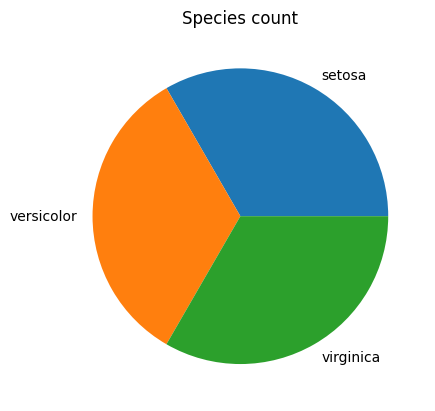

In [21]:
iris['species'].value_counts().plot.pie()
plt.title('Species count')
plt.ylabel('')
plt.savefig('balanced.jpg')

In [22]:
def get_proportions(num_cats):
    import numpy.random as random
    import numpy as np
    nums = [random.random() for x in range(num_cats)]
    summed = np.sum(nums)
    return [x/summed for x in nums]

In [23]:
get_proportions(3)

[0.21144406159181223, 0.3806515776091961, 0.40790436079899167]

In [24]:

def imbalance_dataset(df, target):
    pds = []
    df_len = len(df)
    unique_cats = iris[target].unique()
    proportions = get_proportions(len(unique_cats))
    print(proportions)
    for i, val in enumerate(unique_cats):
        print(val)
        spec = df[df[target] == val]
        spec_len = len(spec)
        #print(f' getting for {val} {round(df_len*proportions[i])} points')
        resultant_pdf = spec.sample(frac=1).head(round(spec_len*proportions[i]))
        print(len(resultant_pdf))
        pds.append(resultant_pdf)
    return pd.concat(pds)



In [25]:
df = imbalance_dataset(iris, 'species')

[0.3316061878522339, 0.085249385970588, 0.5831444261771781]
setosa
17
versicolor
4
virginica
29


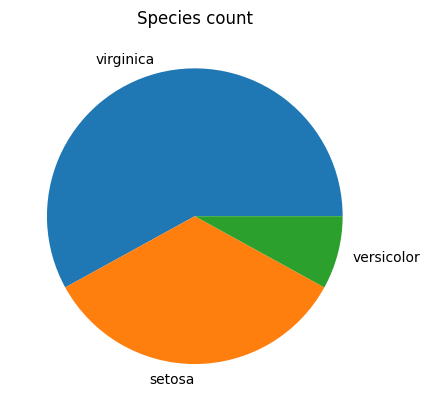

In [26]:
df['species'].value_counts().plot.pie()
plt.title('Species count')
plt.ylabel('')
plt.savefig('imbalanced.jpg')



In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa
38,4.4,3.0,1.3,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
37,4.9,3.6,1.4,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa
46,5.1,3.8,1.6,0.2,setosa
39,5.1,3.4,1.5,0.2,setosa


In [15]:
import matplotlib.pyplot as plt
df.plot.pie(y = df['species'].value_counts())


KeyError: "None of [Index([25, 16, 9], dtype='int64')] are in the [columns]"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

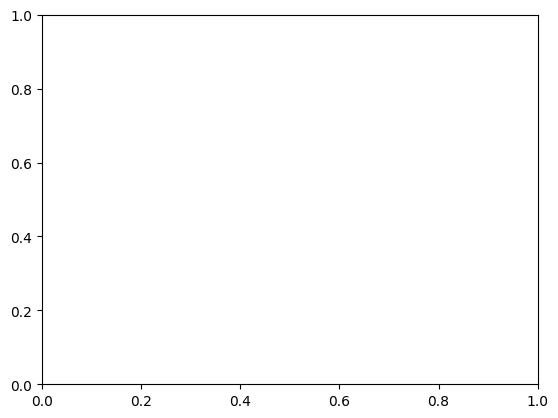

In [111]:
plt.xticks()